## MODEL NON SUPERVISER  | DATA = housing.xls

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [5]:
raw_data = pd.read_excel("input/housing.xlsx")


## Affichage des 5 premier lignes 

In [6]:
raw_data.head()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,owner_sex,house_standing,house_ecological_rate
0,28346,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,M,high,bad
1,28347,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,M,low,good
2,28348,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,F,low,bad
3,28349,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,F,middle,bad
4,28350,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,M,low,bad


## Affichage des 5 dernier lignes 

In [7]:
raw_data.tail()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,owner_sex,house_standing,house_ecological_rate
20635,48981,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND,F,high,bad
20636,48982,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND,M,middle,bad
20637,48983,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND,F,low,best
20638,48984,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND,M,middle,bad
20639,48985,-121.24,39.37,16,2785,616.0,1387,530,2.3886,89400,INLAND,M,middle,best


## Affichage de la dimension du raw_data

In [8]:
raw_data.shape

(20640, 14)

## Affichages des information sur raw_data

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20640 non-null  int64  
 1   longitude              20640 non-null  float64
 2   latitude               20640 non-null  float64
 3   housing_median_age     20640 non-null  int64  
 4   total_rooms            20640 non-null  int64  
 5   total_bedrooms         20433 non-null  float64
 6   population             20640 non-null  int64  
 7   households             20640 non-null  int64  
 8   median_income          20640 non-null  float64
 9   median_house_value     20640 non-null  int64  
 10  ocean_proximity        20640 non-null  object 
 11  owner_sex              20640 non-null  object 
 12  house_standing         20640 non-null  object 
 13  house_ecological_rate  20640 non-null  object 
dtypes: float64(4), int64(6), object(4)
memory usage: 2.2+ 

In [10]:
# la on peut voir que y'as des colonnes  qui sont des valeurs manquants , aussi on voit des types differents 'Object' qu'on devrait la changer en string 

## On commence a changer les types des variables object en string 

In [11]:
# récupérer les colonnes à convertir
stringcols = raw_data.select_dtypes(include='object').columns
print(stringcols)


Index(['ocean_proximity', 'owner_sex', 'house_standing',
       'house_ecological_rate'],
      dtype='object')


In [12]:
# Conversion des types objet en string

raw_data_conv = raw_data.copy()
raw_data_conv[stringcols] = raw_data_conv[stringcols].astype(str)
raw_data_conv[stringcols] = raw_data_conv[stringcols].astype('string')
raw_data_conv[stringcols] = raw_data_conv[stringcols].replace({pd.NA: np.nan})
raw_data_conv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20640 non-null  int64  
 1   longitude              20640 non-null  float64
 2   latitude               20640 non-null  float64
 3   housing_median_age     20640 non-null  int64  
 4   total_rooms            20640 non-null  int64  
 5   total_bedrooms         20433 non-null  float64
 6   population             20640 non-null  int64  
 7   households             20640 non-null  int64  
 8   median_income          20640 non-null  float64
 9   median_house_value     20640 non-null  int64  
 10  ocean_proximity        20640 non-null  string 
 11  owner_sex              20640 non-null  string 
 12  house_standing         20640 non-null  string 
 13  house_ecological_rate  20640 non-null  string 
dtypes: float64(4), int64(6), string(4)
memory usage: 2.2 M

## Detecter les valeurs manquants 

In [13]:
# nombre de valeurs manquantes
print(raw_data_conv.isnull().sum().sort_values(ascending=False))


total_bedrooms           207
id                         0
longitude                  0
latitude                   0
housing_median_age         0
total_rooms                0
population                 0
households                 0
median_income              0
median_house_value         0
ocean_proximity            0
owner_sex                  0
house_standing             0
house_ecological_rate      0
dtype: int64


In [14]:
# Proportion de valeurs manquantes
raw_data_conv.isnull().mean().sort_values(ascending=False)

total_bedrooms           0.010029
id                       0.000000
longitude                0.000000
latitude                 0.000000
housing_median_age       0.000000
total_rooms              0.000000
population               0.000000
households               0.000000
median_income            0.000000
median_house_value       0.000000
ocean_proximity          0.000000
owner_sex                0.000000
house_standing           0.000000
house_ecological_rate    0.000000
dtype: float64

In [15]:
# la on voit que total_bedrooms a des valeurs manquants , donc on doit les imputer 

## Imputer les valeurs manquants 

In [16]:
# parceque total_bedromms est Int , je vais imputer par la moyene

raw_data_conv['total_bedrooms'].fillna(raw_data_conv['total_bedrooms'].mean(), inplace=True)



In [17]:
raw_data_conv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20640 non-null  int64  
 1   longitude              20640 non-null  float64
 2   latitude               20640 non-null  float64
 3   housing_median_age     20640 non-null  int64  
 4   total_rooms            20640 non-null  int64  
 5   total_bedrooms         20640 non-null  float64
 6   population             20640 non-null  int64  
 7   households             20640 non-null  int64  
 8   median_income          20640 non-null  float64
 9   median_house_value     20640 non-null  int64  
 10  ocean_proximity        20640 non-null  string 
 11  owner_sex              20640 non-null  string 
 12  house_standing         20640 non-null  string 
 13  house_ecological_rate  20640 non-null  string 
dtypes: float64(4), int64(6), string(4)
memory usage: 2.2 M

## Detection des doublons 

In [18]:
# Nombre de doublons
nb_doublons = raw_data_conv.duplicated().sum()
print(f"Nombre de doublons : {nb_doublons}")




Nombre de doublons : 0


## Detection des outliners 

In [19]:
raw_data_conv.describe()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,38665.500000,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,5958.399114,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,28346.000000,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,33505.750000,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,38665.500000,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,43825.250000,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,48985.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##  Supprimer les colonnes qui sert a rien

In [20]:
raw_data_conv = raw_data_conv.drop(columns=['longitude'])
raw_data_conv = raw_data_conv.drop(columns=['latitude'])


##  Analyser les donnes 

In [21]:
# Correlation entre les var quantitatifs 

In [22]:
# Sélection uniquement des colonnes de type int ou float
df_num = raw_data_conv.select_dtypes(include=['int64', 'float64'])


In [23]:
correlation_matrix = df_num.corr()
correlation_matrix

,id,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
id,1.000000,-0.181132,0.061896,0.031927,0.024880,0.030186,0.071673,0.072086
housing_median_age,-0.181132,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.061896,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.031927,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.024880,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.030186,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,0.071673,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,0.072086,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


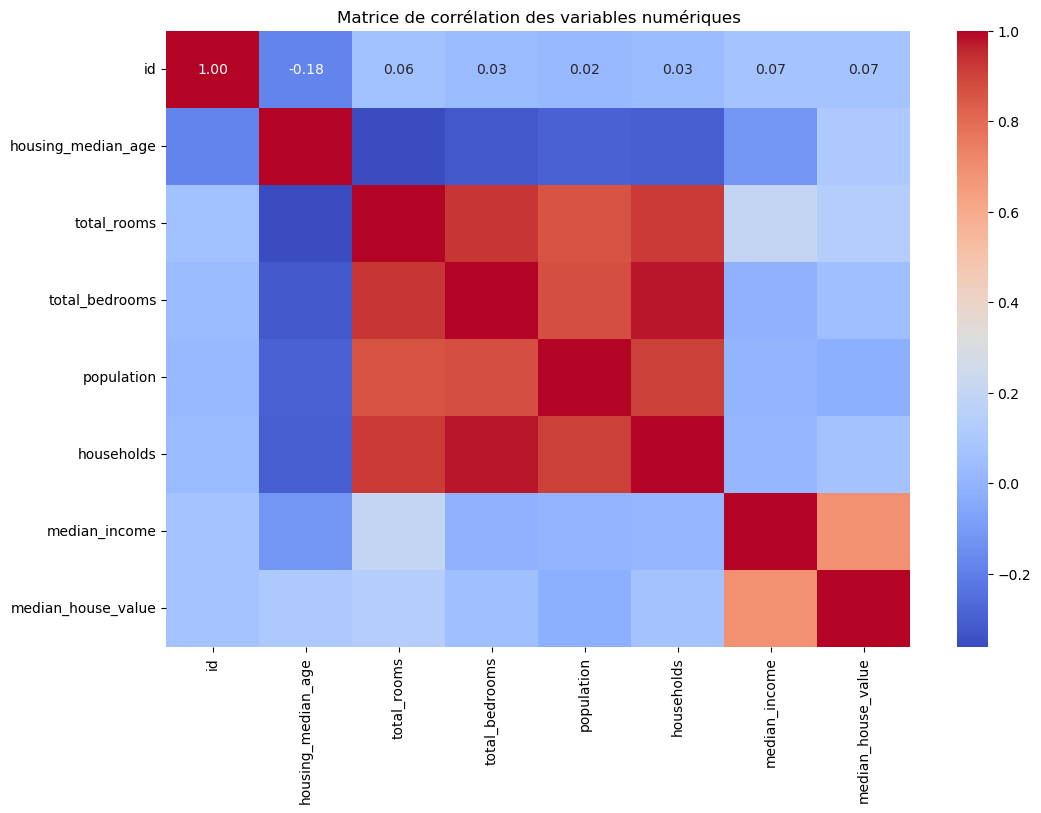

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Matrice de corrélation des variables numériques")
plt.show()





In [25]:
# La variable median_income presente une forte corrélation positive avec median_house_value (0.688) 
# La population est fortement corrélée avec households (0.91) et assez bien corrélée avec total_bedrooms et total_rooms etc

## Affichages des statistiques 

In [26]:
raw_data_conv.describe()

,id,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,38665.500000,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,5958.399114,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,28346.000000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,33505.750000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,38665.500000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,43825.250000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,48985.000000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## LES GRAPHES

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>],
       [<Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>, <Axes: >]],
      dtype=object)

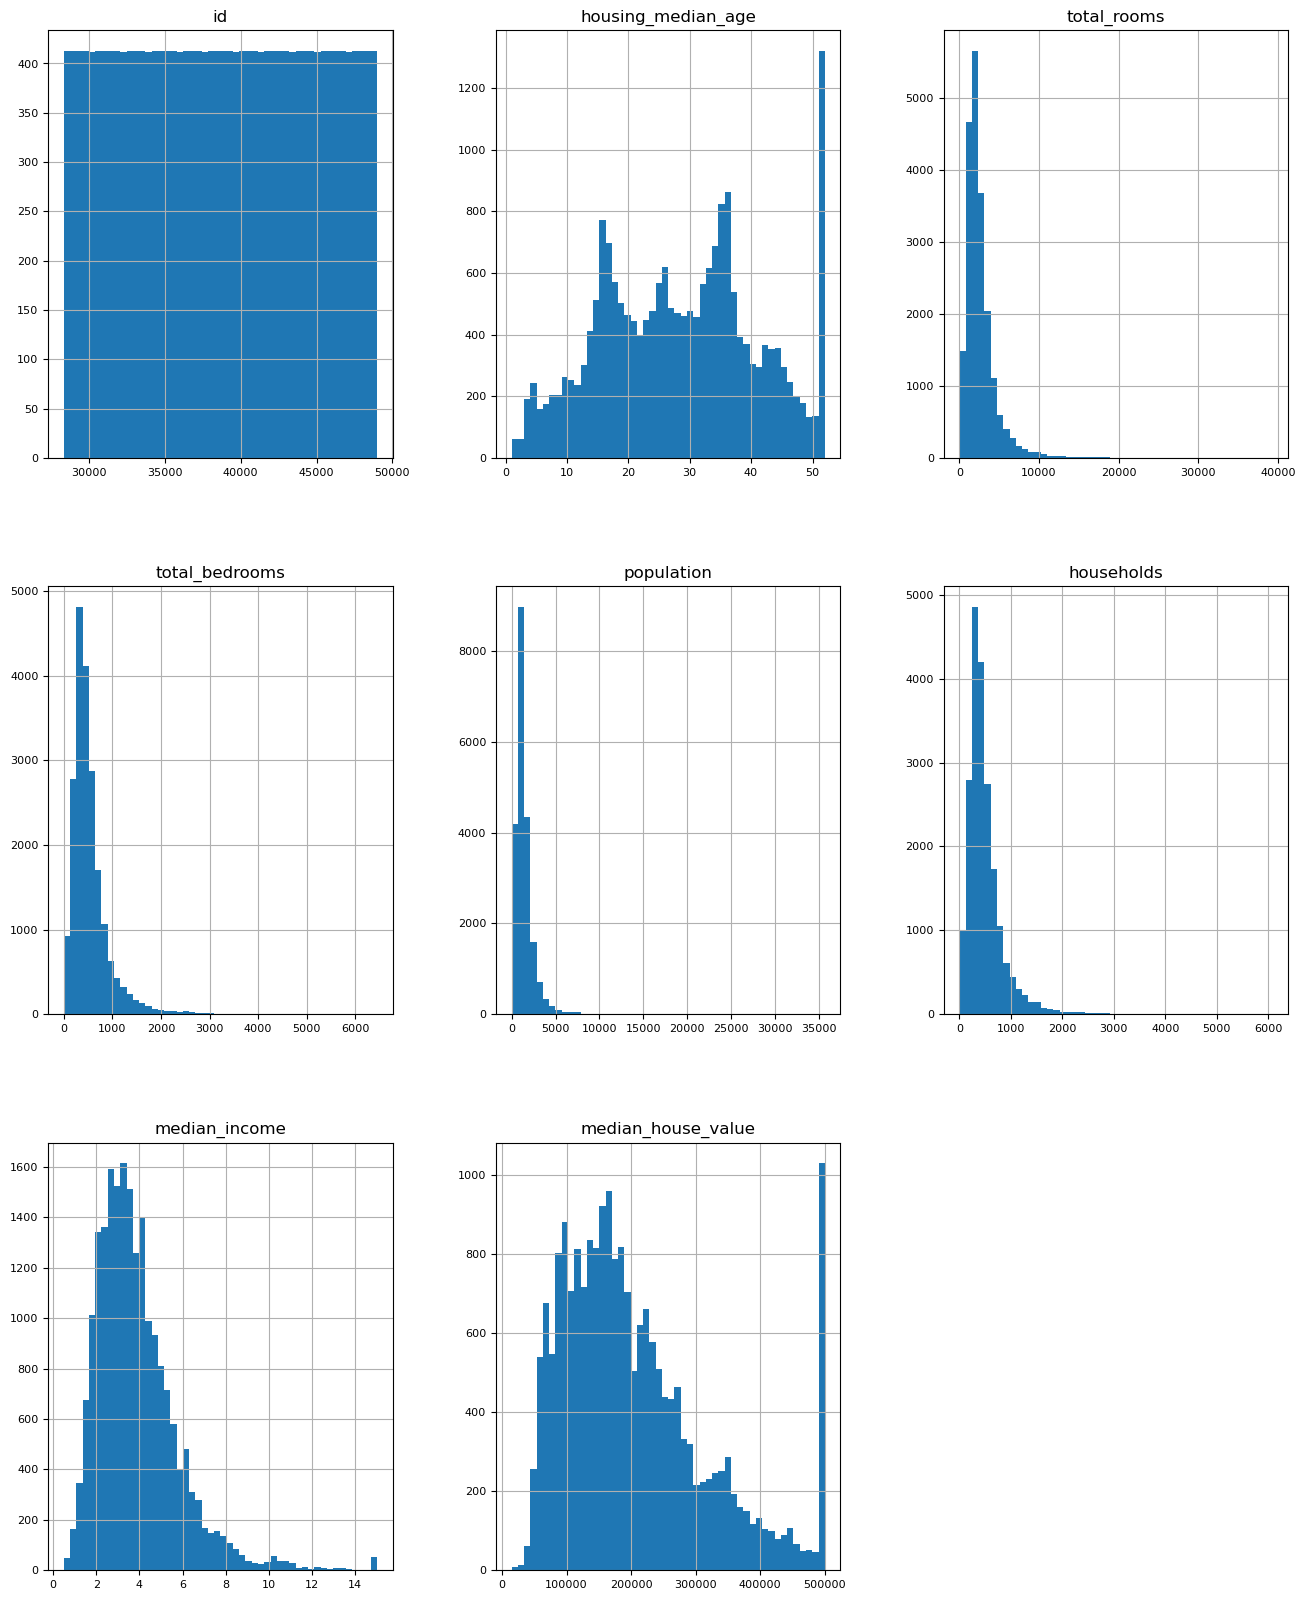

In [27]:
numeric_data = raw_data_conv.select_dtypes(include=['int64', 'float64'])
numeric_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)


In [28]:
## La on voit que imputation qu'on a fait pour total rooms est pas mal 

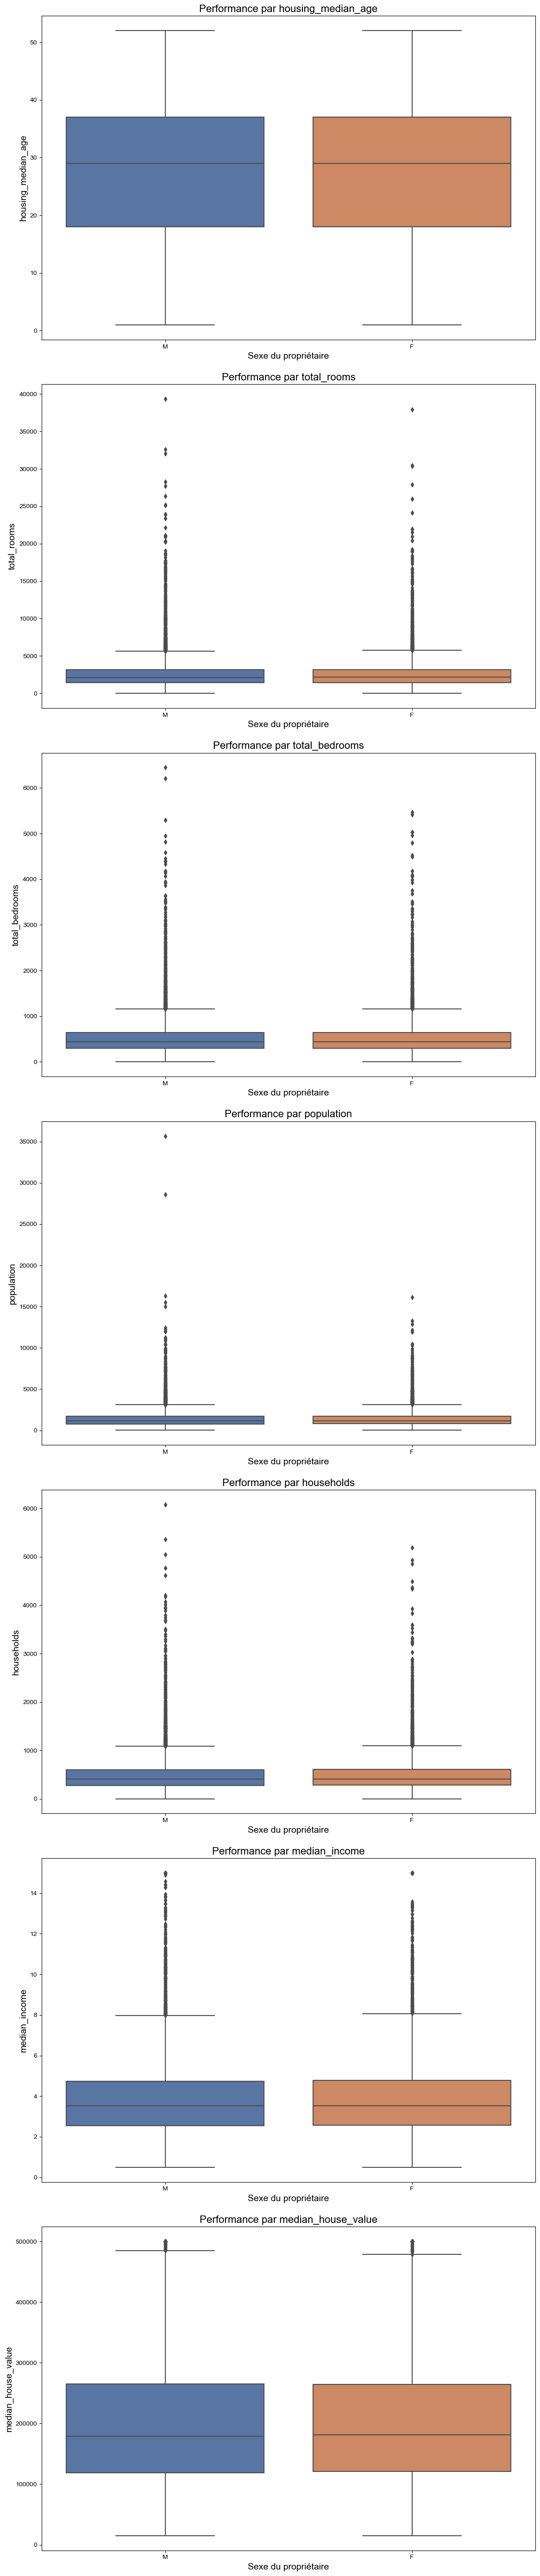

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables numériques pour les boxplots
variables_numeriques = ['housing_median_age', 'total_rooms', 'total_bedrooms', 
                        'population', 'households', 'median_income', 
                        'median_house_value']

# Créer une figure avec une grille d'axes ajustée
fig, axes = plt.subplots(len(variables_numeriques), 1, figsize=(12, 8 * len(variables_numeriques)))

# S'il n'y a qu'un seul graphique, axes sera un tableau de taille 1
if len(variables_numeriques) == 1:
    axes = [axes]

# Ajuster le style et la taille des titres et des labels
sns.set(style="darkgrid", font_scale=1.5)

# Boucle pour chaque variable numérique et création d'un boxplot
for i, var in enumerate(variables_numeriques):
    sns.boxplot(x='owner_sex', y=var, data=raw_data_conv, ax=axes[i])
    axes[i].set_title(f"Performance par {var}", fontsize=16)
    axes[i].set_xlabel("Sexe du propriétaire", fontsize=14)
    axes[i].set_ylabel(var, fontsize=14)

# Ajuster la mise en page pour éviter les chevauchements
plt.tight_layout()

# Afficher les graphiques
plt.show()


In [30]:
## 

## Model non supervisé 

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import metrics
import pandas as pd



In [57]:
## la je selection que les valeurs quantitatif pour faire le model 

In [58]:
from sklearn.cluster import KMeans

In [59]:
# Sélectionner uniquement les variables quantitatives
variables_numeriques = ['housing_median_age', 'total_rooms', 'total_bedrooms', 
                        'population', 'households', 'median_income', 'median_house_value']

# Extraire les données quantitatives
X = raw_data_conv[variables_numeriques]

# Modélisation

In [117]:
model_kmeans = KMeans(n_clusters=3)
model_kmeans.fit(X)

KMeans(n_clusters=3)

## Evaluation

In [118]:
# Evaluation
print(model_kmeans.score(X))
model_kmeans.inertia_

-39118493025961.086


39118493025961.086

In [119]:
clustering_labels_km = model_kmeans.fit_predict(X)

##  Categorisation

In [120]:
X_km = X.copy()
X_km = pd.DataFrame(X_km)
X_km['clusters'] = clustering_labels_km
X_km['clusters'].value_counts()

clusters
1    10216
0     7323
2     3101
Name: count, dtype: int64

In [121]:
metrics.silhouette_score(X_km, X_km['clusters'])

0.5685135827966571

In [124]:
from mlxtend.plotting import plot_pca_correlation_graph
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns


## Appliquer le PCA + Visualisation

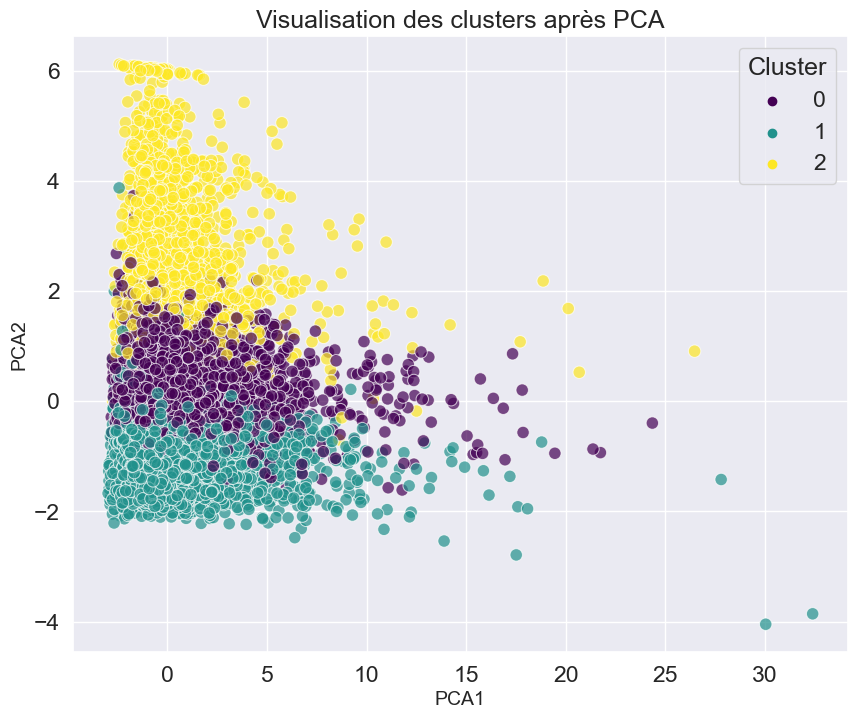

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer PCA pour réduire à 3 dimensions
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Créer un DataFrame pour visualiser les résultats PCA
pca_df = pd.DataFrame(X_pca, columns=[f'PCA{i+1}' for i in range(3)])

# Ajouter les clusters aux résultats PCA
pca_df['cluster'] = clustering_labels_km

# Visualisation des clusters dans l'espace PCA (avec PCA1 et PCA2)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=pca_df, palette="viridis", s=80, alpha=0.7)
plt.title("Visualisation des clusters après PCA", fontsize=18)
plt.xlabel("PCA1", fontsize=14)
plt.ylabel("PCA2", fontsize=14)
plt.legend(title='Cluster', loc='best')
plt.show()


In [127]:
## Recueil des informations par axe
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
percent_variance

array([55.48, 24.29, 12.92])

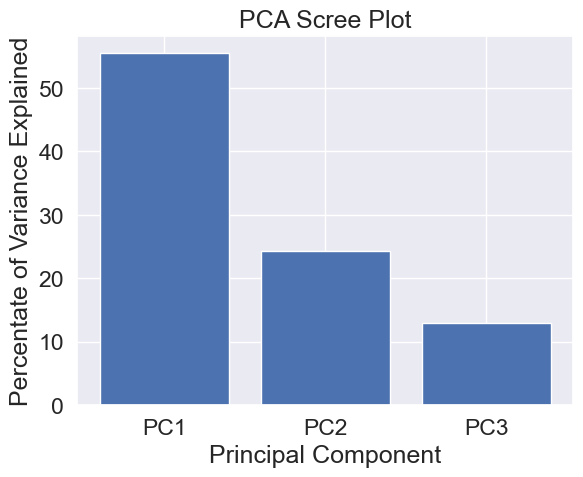

In [128]:
columns = ['PC1', 'PC2', 'PC3']
plt.bar(x= range(1,4), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [129]:
X_pca_2d = X_pca[:, :2]
# Exemple d'un modèle KMeans avec ces deux dimensions
model_kmeans_2d = KMeans(n_clusters=3)
model_kmeans_2d.fit(X_pca_2d)

KMeans(n_clusters=3)

##  Evaluation du modèle apre PCA


In [130]:
print("Score du modèle KMeans (PCA 2D) :", model_kmeans_2d.score(X_pca_2d))
print("Inertie du modèle KMeans (PCA 2D) :", model_kmeans_2d.inertia_)


Score du modèle KMeans (PCA 2D) : -50970.633239579525
Inertie du modèle KMeans (PCA 2D) : 50970.633239579525


In [131]:
clustering_labels_km_2d = model_kmeans_2d.predict(X_pca_2d)


In [132]:
silhouette_avg = metrics.silhouette_score(X_pca_2d, clustering_labels_km_2d)


In [133]:
silhouette_avg

0.40451115920545977

##  Recherche du k optimal par la méthode du coude


In [134]:
# Recherche du k optimal par la méthode du coude
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X_pca)
    inertia.append(model.inertia_)

Text(0, 0.5, 'Inertia')

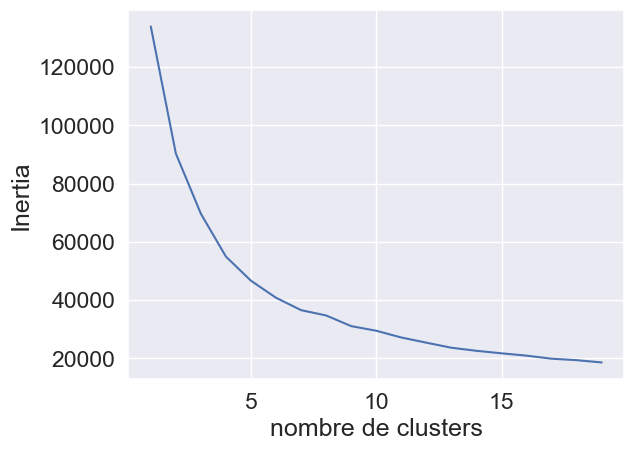

In [135]:
# Visualisation du coude
plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Inertia')

In [143]:
# la on voit que le nombre optimal c'est presque 3 ou 4  ( j'ai pris 3)

raw_data_conv['Cluster' ] = clustering_labels_km


## Voir les groupes 

In [142]:
profil_clusters = raw_data_conv.groupby('Cluster').mean(numeric_only=True)

print(profil_clusters)
profil_clusters.T

                   id  housing_median_age  total_rooms  total_bedrooms  \
Cluster                                                                  
0        38947.092039           28.447767  2870.700942      577.715920   
1        38303.930991           27.760572  2353.172181      509.417033   
2        39191.682038           31.987746  3011.931635      537.513743   

          population  households  median_income  median_house_value  \
Cluster                                                               
0        1502.320361  544.045610       4.258255       238588.583914   
1        1423.023297  465.980423       2.871321       117885.199295   
2        1252.093518  504.997420       6.247672       425025.690100   

         Cluster_PCA  
Cluster               
0           0.550867  
1           0.167972  
2           1.048694  


Cluster,0,1,2
id,38947.092039,38303.930991,39191.682038
housing_median_age,28.447767,27.760572,31.987746
total_rooms,2870.700942,2353.172181,3011.931635
total_bedrooms,577.715920,509.417033,537.513743
population,1502.320361,1423.023297,1252.093518
households,544.045610,465.980423,504.997420
median_income,4.258255,2.871321,6.247672
median_house_value,238588.583914,117885.199295,425025.690100
Cluster_PCA,0.550867,0.167972,1.048694


In [145]:
# au final on a 3 groupes , 3 categorier


In [1]:
git init


SyntaxError: invalid syntax (3277417328.py, line 1)